<a href="https://colab.research.google.com/github/wallisonferreira/analysis_algo/blob/master/analise_algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de tempo de execução em máquina física de algoritmos de ordenação

In [2]:
# convida a galera pra festa
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Sobre o módulo _timit_
###timeit.default_timer()
<p style="text-align:justify;">Define a default timer, in a platform-specific manner. On Windows, time.clock() has microsecond granularity, but time.time()’s granularity is 1/60th of a second. On Unix, time.clock() has 1/100th of a second granularity, and time.time() is much more precise. On either platform, default_timer() measures wall clock time, not the CPU time. This means that other processes running on the same computer may interfere with the timing.</p>
<a href="https://docs.python.org/2/library/timeit.html">Python Doc</a>

Declaramos os algoritmos

In [3]:
# fonte dos algoritmos: CodeGeeks - https://www.geeksforgeeks.org/python-program-for-insertion-sort/?ref=rp
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp

def selectSort(alist):
    for i in range(len(alist)):   
        min_idx = i 
        for j in range(i+1, len(alist)): 
            if alist[min_idx] > alist[j]: 
                min_idx = j                  
        alist[i], alist[min_idx] = alist[min_idx], alist[i]

def insertionSort(alist): 
    for i in range(1, len(alist)): 
        key = alist[i] 
        j = i-1
        while j >=0 and key < alist[j] : 
                alist[j+1] = alist[j] 
                j -= 1
        alist[j+1] = key

Overview sobre o fluxo que será utilizado para analisar os algoritmos

In [4]:
# declara lista
alist = [54,26,93,17,77,31,44,55,20]

# tempo inicial
start = timeit.default_timer()

# execução do algoritmo
selectSort(alist)

# tempo final
stop = timeit.default_timer()

time = stop - start

# visualizar resultado
print(alist, time)

[17, 20, 26, 31, 44, 54, 55, 77, 93] 3.776500000185479e-05


<p>Esta análise presume que o pior caso para ordenação de algoritmos, genericamente, seja uma estrutura de dados de sequência inversa. Portanto, há limitações para casos onde a estrutura de dados obedeça uma ordem logaritmica.</p>

In [5]:
# gerar lista inversamente ordenada com n termos
def gerarLista(n):
    return [i for i in range(n, 0, -1)]

# conta o tempo de um algoritmo para cada lista
def contaTempo(algoritmo, lista):
    start = timeit.default_timer()
    algoritmo(lista)
    stop = timeit.default_timer()
    return stop - start

# retorna lista de tempo de execução para cada lista de n_termos
def testaAlgoritmo(n, algoritmo_arg):
    list_time = list()
    for i in range(1, n+1):
        l = gerarLista(i)
        time = contaTempo(algoritmo_arg, l)
        list_time.append(time)
    return list_time

Executa testes para cada algoritmo de 0 a 1000 itens

In [6]:
bubbleSort_time = testaAlgoritmo(1000, bubbleSort)
insertSort_time = testaAlgoritmo(1000, insertionSort)
selectSort_time = testaAlgoritmo(1000, selectSort)

Visualizando tempo de execução de algoritmos para ordenação de 1 até 1000 termos em ordem inversa.

Podemos ver que o BubbleSort realiza mais comparações, sendo impactado negativamente com o crescimento do número de termos. O Select Sort leva menos tempo para realizar suas comparações, sendo portanto mais conveniente dentre os três algoritmos analisados.

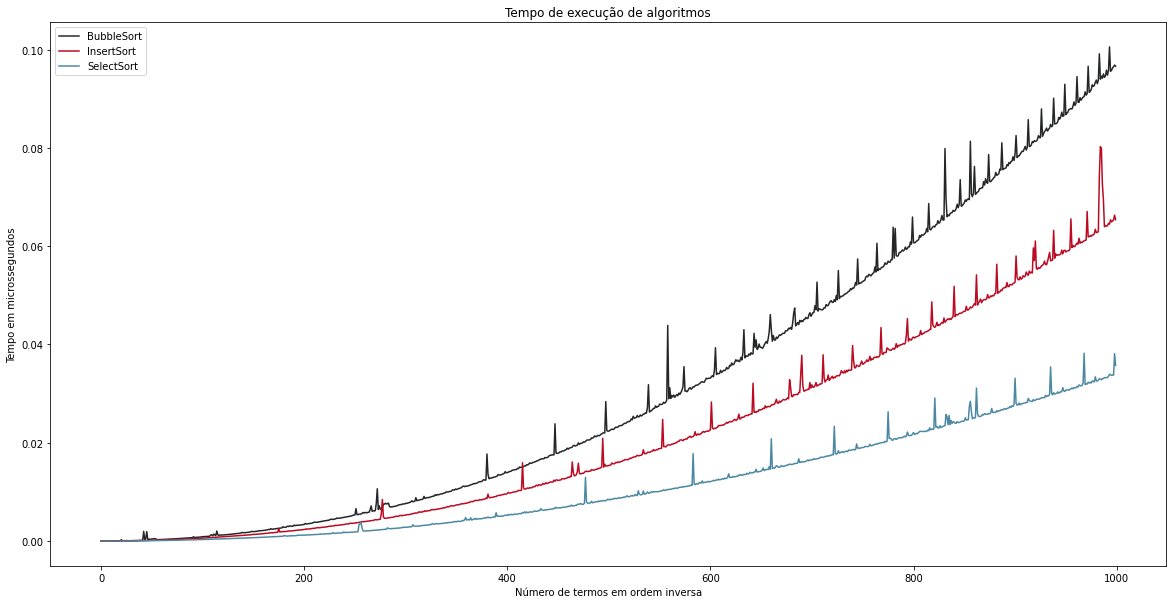

In [46]:
%matplotlib inline
plt.rcParams["figure.figsize"]=(20,10)
plt.title('Tempo de execução de algoritmos')
plt.plot(bubbleSort_time, color='#252627', linestyle="-", label='BubbleSort')
plt.plot(insertSort_time, color='#BB0A21', linestyle="-", label='InsertSort')
plt.plot(selectSort_time, color='#4B88A2', linestyle="-", label='SelectSort')
plt.ylabel('Tempo em microssegundos')
plt.legend()
plt.xlabel('Número de termos em ordem inversa')
plt.show()